<h1> PROJECT OVERVIEW </H1>

descrivere lo scopo del progetto - obiettivi, cosa faremo, contesto di lavoro (spiegare come funzionano inverter energia ecc..)

<h2>Importing Libraries </h2>

In [1596]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

<H2>Exploratory Data Analysis </h2>

<h3>Loading The Data</h3>

descrizione da dove abbiamo preso i dati e cosa rappresentano, come sono organizzati

In [1597]:
#plant 1 generation data 
p1_gen_df = pd.read_csv('Plant_1_Generation_Data.csv')

#plant 2 generation data
p2_gen_df = pd.read_csv('Plant_2_Generation_Data.csv')

#plant 1 weather sensor data
p1_wea_df = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

#plant 2 weather sensor data
p2_wea_df = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

<h3> EDA Generation Data Plant 1</h3>

dire che inizialmente condurremo l'analisi solo sul primo impianto, in seguito lavoreremo anche sul secondo

<h3>First Look </h3>

In [1598]:
#first 5 rows of the generation data for plant 1
p1_gen_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [1599]:
#last 5 rows of the generation data for plant 1
p1_gen_df.tail(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


descrizione / spiegazione generation data df e delle sue varibili

<h3>Shape and Size</h3>

In [1600]:
# shape and size of the dataset
p1_gen_shape = p1_gen_df.shape
p1_gen_size = p1_gen_df.size
print(f'The Generation Data for the plant 1 is composed by: {p1_gen_shape[0]} rows and {p1_gen_shape[1]} columns.\nFor a total of {p1_gen_size} values')

The Generation Data for the plant 1 is composed by: 68778 rows and 7 columns.
For a total of 481446 values


<h3>Dataframe Info</h3>

In [1601]:
#information about the Generation Data for the plant 1
p1_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


The dataframe info command give us useful information about the type of the features, the number of null-values and the dimension of the dataset. We can simply notice that the for each columns of the dataset the number of non-null values is the same of the number of rows of the entire dataset, it means that we don't have null values.

<h3>Missing Data </h3>

In [1602]:
#to be sure, we can still check for null values
p1_gen_df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

we don't have missing data.

<h3>Statistics Summary</h3>

In [1603]:
#statistics description of the generation data for the plant 1
p1_gen_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,68778.0,4.135001e+06,0.000000,4135001.0,4.135001e+06,4.135001e+06,4.135001e+06,4135001.000
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


The .describe() method provide a statistics summary of data belonging to numerical datatype for our dataset

<h3>Column Names</h3>

In [1604]:
#adjusting the name of the columns in order to make it easier to work with
p1_gen_df.columns = list(map(lambda x : x.lower(),p1_gen_df.columns))
p1_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

<h3>Feature Analysis</h3>

In [1605]:
#date_time
p1_gen_df['date_time']

0        15-05-2020 00:00
1        15-05-2020 00:00
2        15-05-2020 00:00
3        15-05-2020 00:00
4        15-05-2020 00:00
               ...       
68773    17-06-2020 23:45
68774    17-06-2020 23:45
68775    17-06-2020 23:45
68776    17-06-2020 23:45
68777    17-06-2020 23:45
Name: date_time, Length: 68778, dtype: object

In the date time column we have the values every 15 min from 15-05-2020 0:00 until 17-06-2020 23:45. In order to make it easier to work with dates we convert them to time date format

In [1606]:
#converting the date_time column in format: datetime ('<M8[ns]')
p1_gen_df['date_time'] = pd.to_datetime(p1_gen_df['date_time'])
p1_gen_df['date_time'].dtype

dtype('<M8[ns]')

I create a function to figure out which days we have observations for:

In [1607]:
#extract all the days that are observed in our dataset
def days_analyzed():
    copy1 = p1_gen_df.copy()
    copy1['day_month_year'] = copy1['date_time'].dt.strftime('%d-%m-%Y')
    date_list = []
    for i in copy1['day_month_year']:
        if i not in date_list:
            date_list.append(i)
    return date_list
days_analyzed()

['15-05-2020',
 '16-05-2020',
 '17-05-2020',
 '18-05-2020',
 '19-05-2020',
 '20-05-2020',
 '21-05-2020',
 '22-05-2020',
 '23-05-2020',
 '24-05-2020',
 '25-05-2020',
 '26-05-2020',
 '27-05-2020',
 '28-05-2020',
 '29-05-2020',
 '30-05-2020',
 '31-05-2020',
 '06-01-2020',
 '06-02-2020',
 '06-03-2020',
 '06-04-2020',
 '06-05-2020',
 '06-06-2020',
 '06-07-2020',
 '06-08-2020',
 '06-09-2020',
 '06-10-2020',
 '06-11-2020',
 '06-12-2020',
 '13-06-2020',
 '14-06-2020',
 '15-06-2020',
 '16-06-2020',
 '17-06-2020']

We can observe that the days taken into consideration are from 15-05-2020 to 17-06-2020

In [1608]:
#source_key
p1_invertes = list(p1_gen_df['source_key'].value_counts().index)
p1_invertes

['bvBOhCH3iADSZry',
 '1BY6WEcLGh8j5v7',
 '7JYdWkrLSPkdwr4',
 'VHMLBKoKgIrUVDU',
 'ZnxXDlPa8U1GXgE',
 'ih0vzX44oOqAx2f',
 'z9Y9gH1T5YWrNuG',
 'wCURE6d3bPkepu2',
 'uHbuxQJl8lW7ozc',
 'pkci93gMrogZuBj',
 'iCRJl6heRkivqQ3',
 'rGa61gmuvPhdLxV',
 'sjndEbLyjtCKgGv',
 'McdE0feGgRqW7Ca',
 'zVJPv84UY57bAof',
 'ZoEaEvLYb1n2sOq',
 '1IF53ai7Xc0U56Y',
 'adLQvlD726eNBSB',
 'zBIq5rxdHJRwDNY',
 'WRmjgnKYAwPKWDb',
 '3PZuoBAID5Wc2HD',
 'YxYtjZvoooNbGkE']

The Plant 1 is composed by 22 inversters which we have observations over time, those above are the names of the different inverters.

To facilitate the following analysis we transform the type of the source_key column from object to string

In [1609]:
p1_gen_df['source_key'] = p1_gen_df['source_key'].astype(str)

Plotting the Histograms of the features:

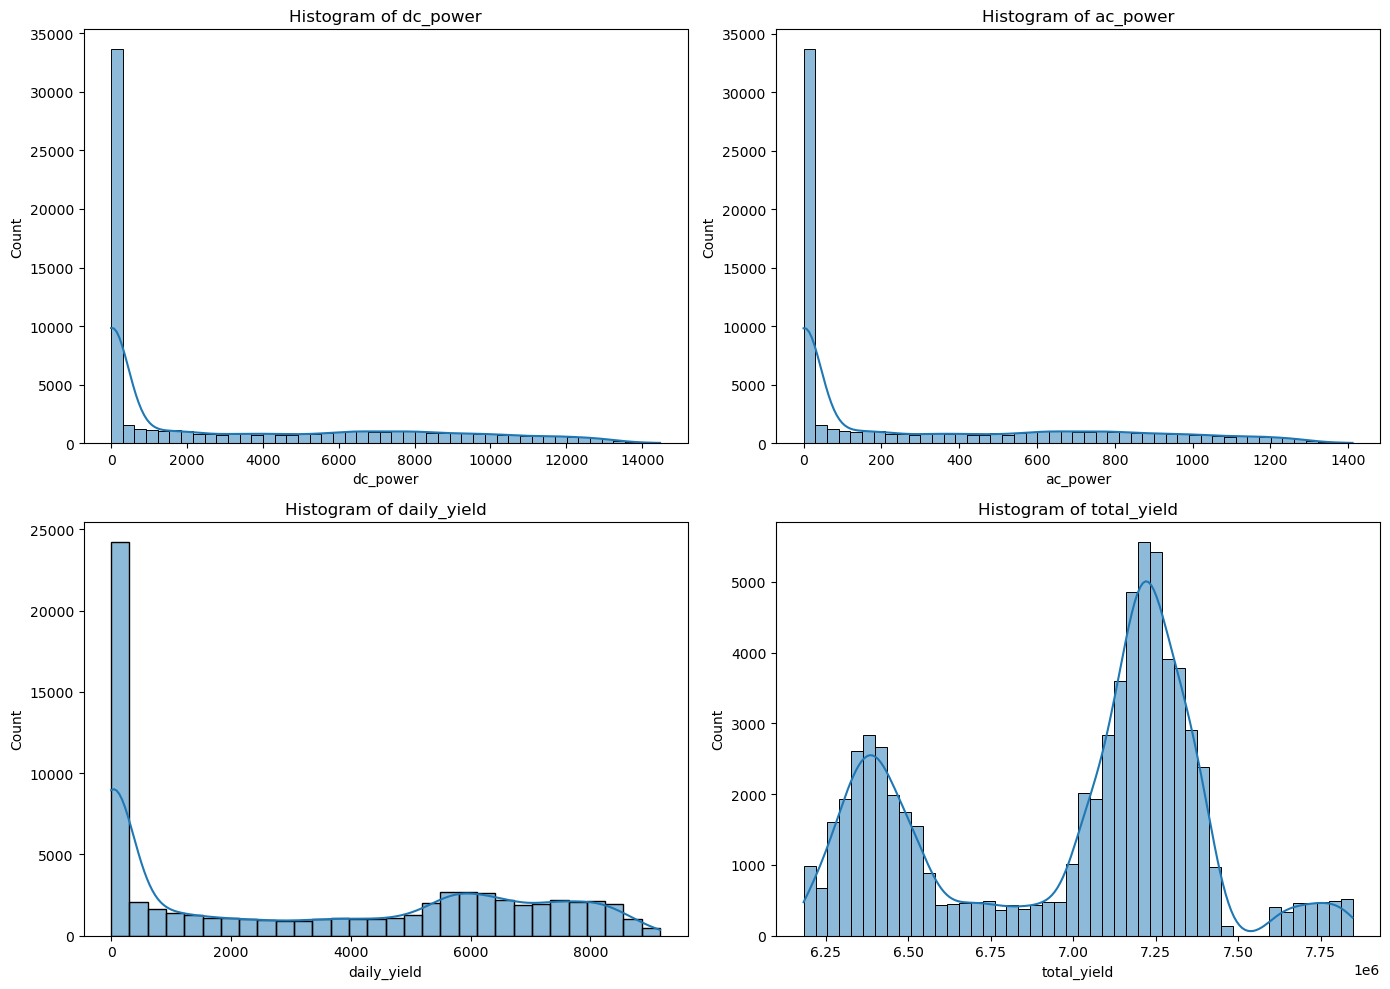

In [1610]:
#creating the histograms for this columns
columns_to_check = ['dc_power','ac_power','daily_yield','total_yield']

num_col = len(columns_to_check)
num_rows = (num_col // 2) + (num_col % 2)

#creating the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,5 * num_rows))

axes = axes.flatten()

for ax, col in zip(axes, columns_to_check):
    sns.histplot(p1_gen_df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

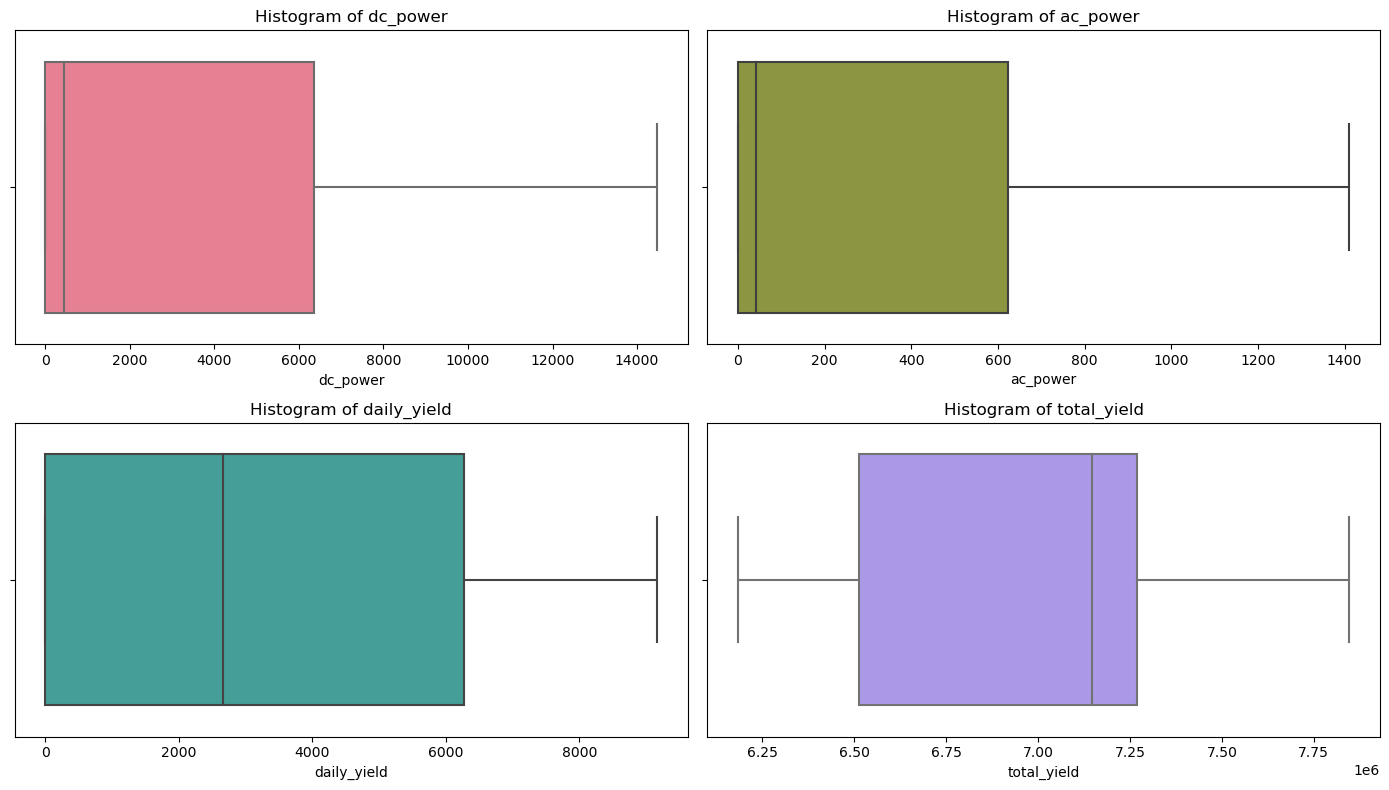

In [1611]:
#box plots of the Plant 1 Generation Data
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,4 * num_rows))
axes = axes.flatten()
colors = sns.color_palette("husl", len(columns_to_check))

for ax, col, color in zip(axes, columns_to_check, colors):
    sns.boxplot(x=p1_gen_df[col], ax = ax, color= color)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

non so se tenere questo grafico non capisco che informazioni può fornire

<h3>Observations </h3>

We can see that the histograms for AC_power and DC_power have numerous values of 0, this is due to the fact that during nighttime hours the inverters are unable to produce power. In the following analyses we are going to investigate whether these values are always correct or sometimes they may be due to some kind of malfunctioning. In indeed, some of these 0.0 output values could mean that the inverters/sensors are malfunctioning

<h2>Data Visualization </h2>

In this section we will make several plots that will help us to better understand the data, we will try to extract information from them that will be useful in achieving the goals of the project and the implementation of the predictive models

<h3>DC_power & AC_power</h3>

In [1612]:
def daily_dc_ac_distribution():
    copy_df = p1_gen_df.copy()
    copy_df['date_time'] = copy_df['date_time'].dt.strftime('%H:%M')
    mean_dc = copy_df.groupby('date_time')['dc_power'].mean().reset_index()
    mean_ac = copy_df.groupby('date_time')['ac_power'].mean().reset_index()
    plt.figure(figsize=(15, 7))
    sns.scatterplot(data=copy_df, x='date_time', y='dc_power', alpha=0.6, color='forestgreen', label='DC Power')
    sns.scatterplot(data=copy_df, x='date_time', y='ac_power', alpha=0.6, color='orange', label='AC Power')
    plt.plot(mean_dc['date_time'], mean_dc['dc_power'], color='darkgreen', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean DC Power')
    plt.plot(mean_ac['date_time'], mean_ac['ac_power'], color='darkorange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean AC Power')
    plt.title('Daily DC and AC Power Distribution')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

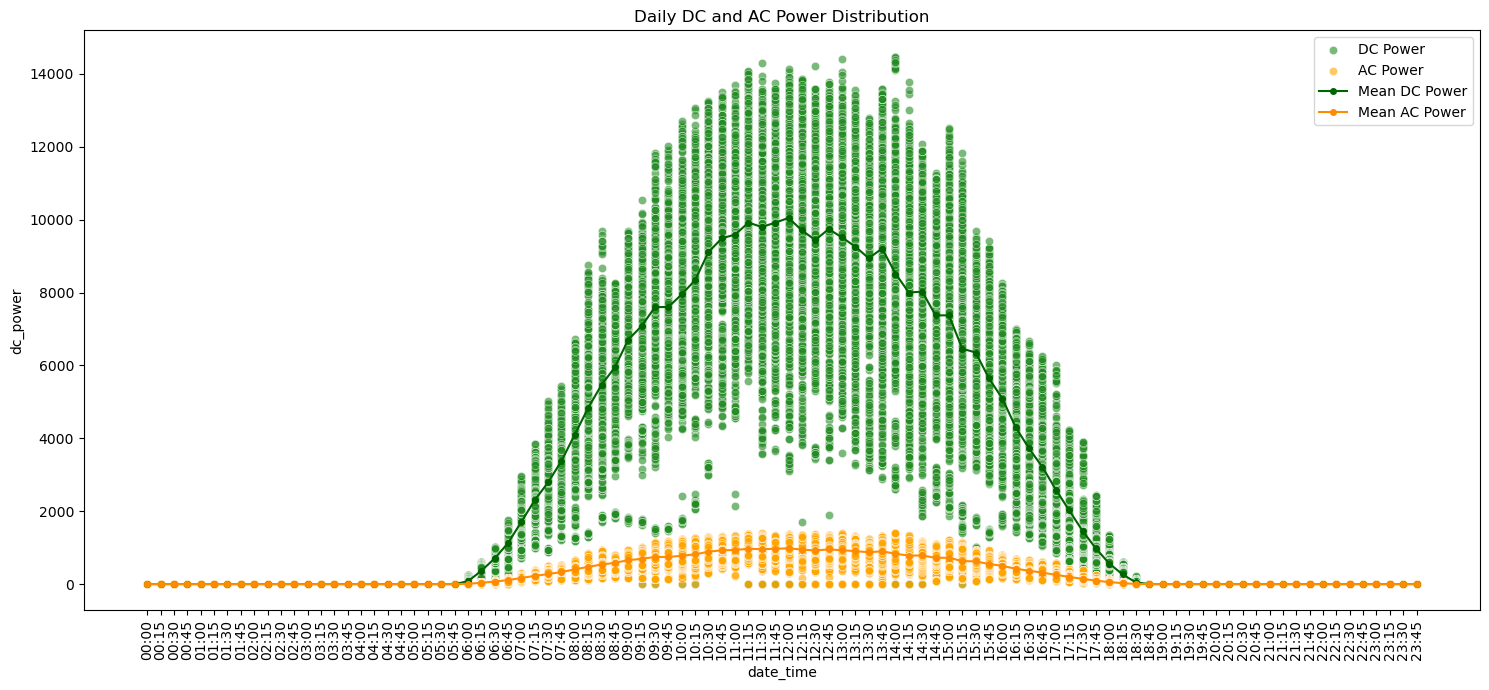

In [1613]:
daily_dc_ac_distribution()

This graph allows us to visualize the distribution of dc_power and ac_power produced daily. Recall that the dc_power represents the amount of solar energy that has been collected by the panel and converted to direct current, while the ac_power represents the direct current that the inverter has converted to alternate_current to allow it to be used and transported. As can be seen from the daily distribution, the current is produced from 5:45 am until approximately 6:45 pm, which is during the times when the panels are subject to sunlight.

<h3>Inverters</h3>

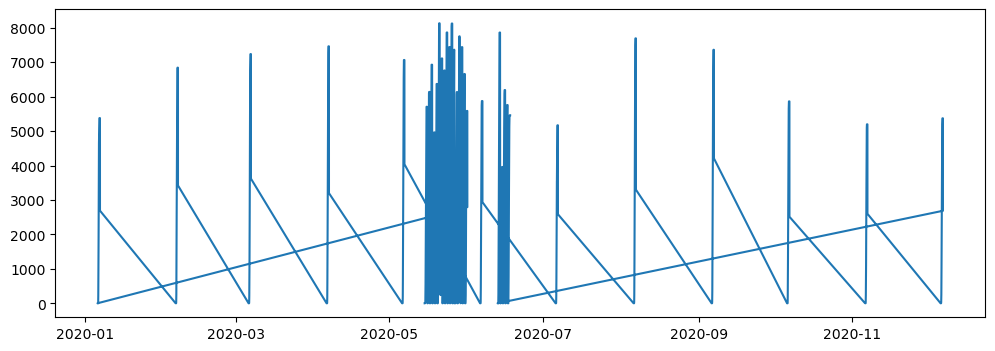

In [1641]:
#for each inverter plot is daily yield ossia la sua produzione di energia
#questo lavoro deve essere fatto solo per alcuni giorni per i quali si nota qualocosa di strano altrimenti poco utile
plt.figure(figsize=(12,4)) 
ff = p1_gen_df[p1_gen_df['source_key'] == p1_invertes[0]]
plt.plot(ff['date_time'],ff['daily_yield'])
plt.show()

In [1643]:
p1_gen_df[p1_gen_df['daily_yield'] == 0.0]

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.00,0.0,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.00,0.0,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.00,0.0,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.00,0.0,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.00,0.0,7158964.0
...,...,...,...,...,...,...,...
67277,2020-06-17 06:45:00,4135001,uHbuxQJl8lW7ozc,473.5,45.95,0.0,7281035.0
67278,2020-06-17 06:45:00,4135001,wCURE6d3bPkepu2,464.5,45.10,0.0,7022718.0
67279,2020-06-17 06:45:00,4135001,z9Y9gH1T5YWrNuG,462.5,44.90,0.0,7245385.0
67280,2020-06-17 06:45:00,4135001,zBIq5rxdHJRwDNY,453.0,44.00,0.0,6577552.0


<h3>Daily Yield </h3>

The daily yield represents the daily performance of the inverter specifically the amount of alternating energy it was able to convert, in the following plots we will try to understand its performance over the period under consideration

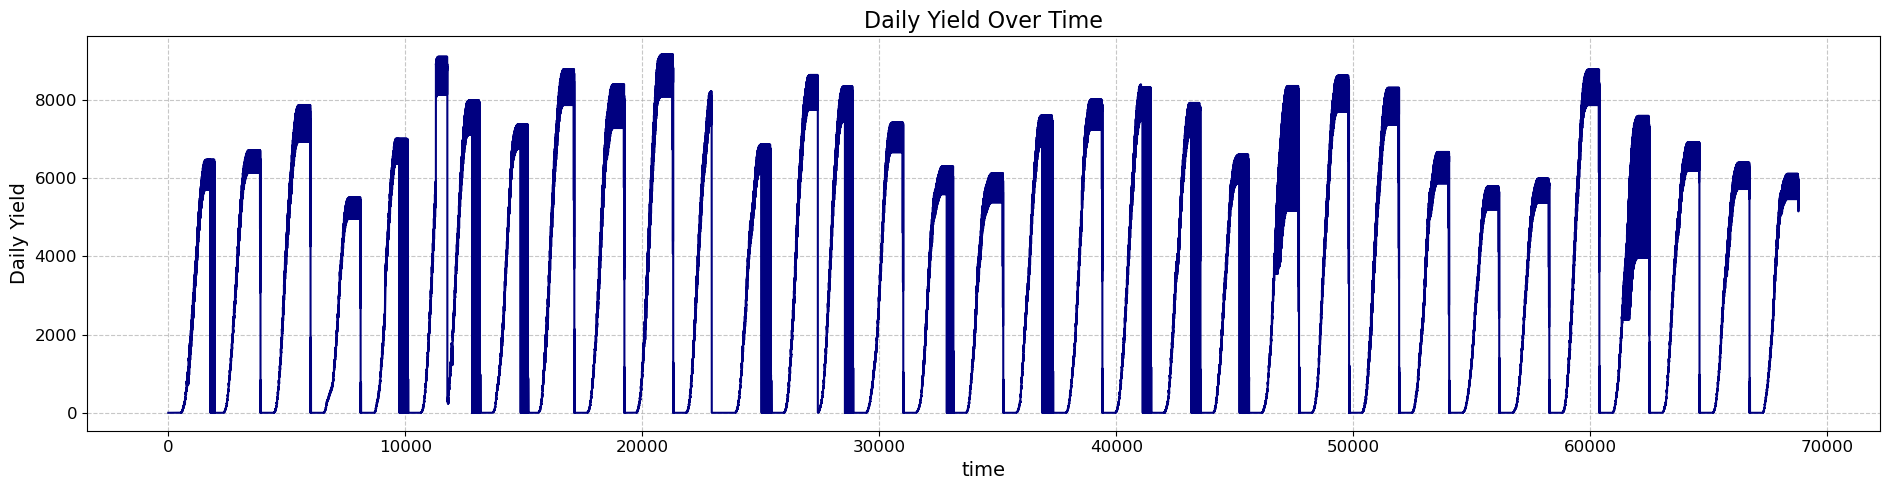

In [1639]:
#plotting the daily yield over time
plt.figure(figsize=(19, 5))

p1_gen_df['daily_yield'].plot(color='navy')

plt.title('Daily Yield Over Time', fontsize=16)
plt.xlabel('time', fontsize=14)  
plt.ylabel('Daily Yield', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The daily yield represents the amount of ac_power produced, it represents a cumulative sum for each day, this explains the shape of the graph made by high and low peaks. In fact, as we could see from the previous graph in which we analyzed the relationship between dc_power and ac_power, energy is produced only at certain times of day (those when the sun is present). So we can see the bases of the peaks remaining at zero for some time

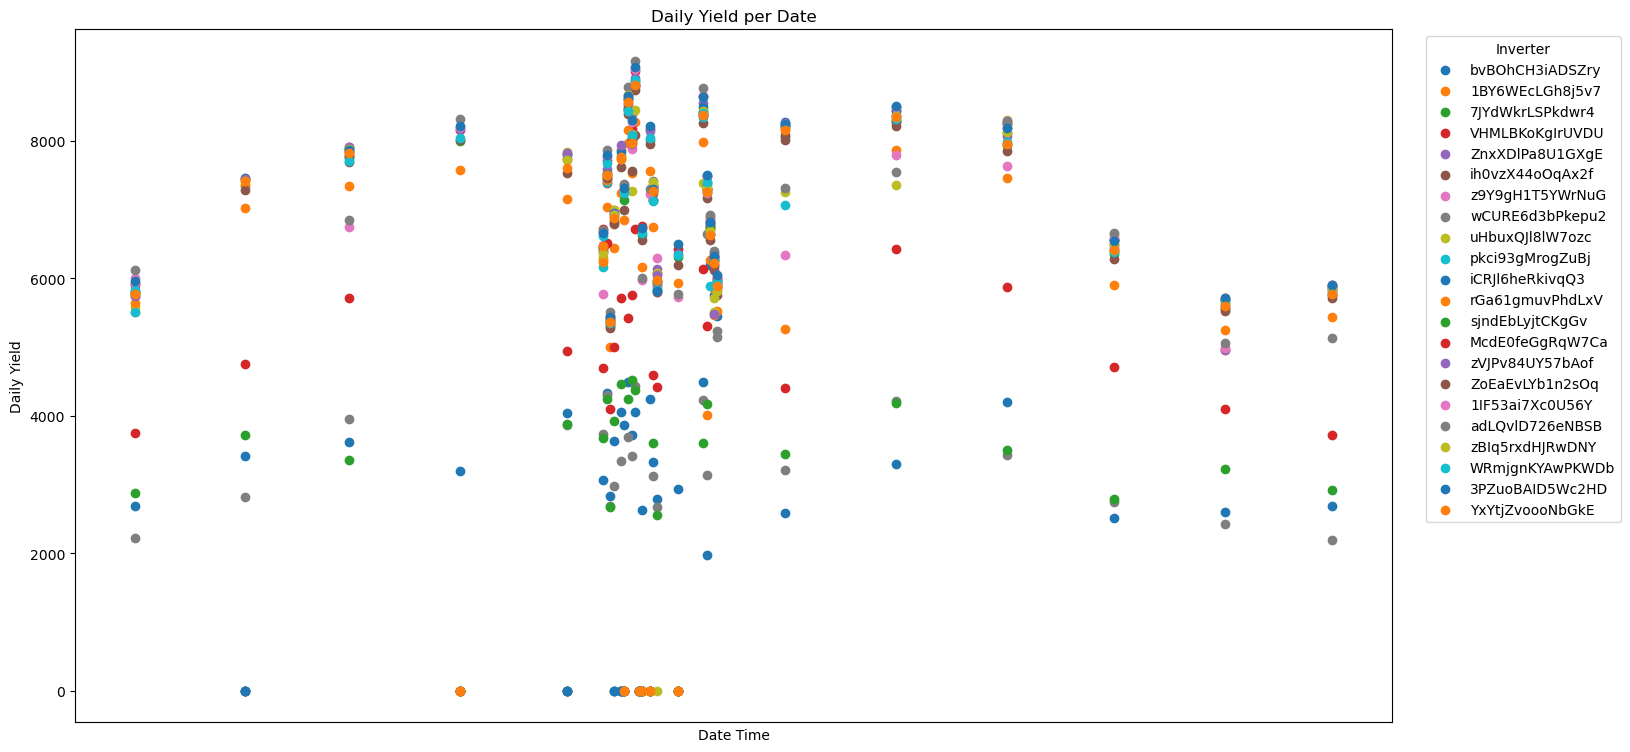

In [1626]:
#plotting the daily yield for each inverter in each day
plt.figure(figsize=(17,9))

for i in p1_invertes:
    daily_yield = p1_gen_df[p1_gen_df['date_time'].dt.time == pd.to_datetime('23:45:00').time()]
    invert_dy = daily_yield[daily_yield['source_key'] == i]
    daily_sum = invert_dy.groupby('date_time')['daily_yield'].sum()
    plt.scatter(daily_sum.index, daily_sum.values, label=i)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('Daily Yield per Date')
plt.xlabel('Date Time')
plt.ylabel('Daily Yield')
plt.legend(title='Inverter', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

This graph allows us to note one important thing which is that there are some days for which the inverters did not produce ac_power, this could be due to several reasons: for example that day the plant was inactive or there were malfunctions in the inverters

DA FARE quindi ora che ho visto che alle 23.45 ci sono alcuni inverter che in alcuni giorni hanno avuto un daily yiled pari a 0 significa che c'è qualche problema, vado a fare dei grafici relativi perchè ci possono forse spiegare per quale ragione l'energia prodotta è stata 0

In [1651]:
daily_yield = p1_gen_df[p1_gen_df['date_time'].dt.time == pd.to_datetime('23:45:00').time()]
zero_production = daily_yield[daily_yield['daily_yield'] == 0.0]
zero_production['source_key'].value_counts().index[0:3]

zBIq5rxdHJRwDNY    7
iCRJl6heRkivqQ3    6
pkci93gMrogZuBj    6
zVJPv84UY57bAof    6
z9Y9gH1T5YWrNuG    6
wCURE6d3bPkepu2    6
uHbuxQJl8lW7ozc    6
sjndEbLyjtCKgGv    6
McdE0feGgRqW7Ca    6
YxYtjZvoooNbGkE    6
ZoEaEvLYb1n2sOq    6
rGa61gmuvPhdLxV    6
1IF53ai7Xc0U56Y    5
3PZuoBAID5Wc2HD    5
adLQvlD726eNBSB    5
WRmjgnKYAwPKWDb    5
ih0vzX44oOqAx2f    4
ZnxXDlPa8U1GXgE    4
VHMLBKoKgIrUVDU    4
7JYdWkrLSPkdwr4    4
1BY6WEcLGh8j5v7    1
bvBOhCH3iADSZry    1
Name: source_key, dtype: int64

questo dato ci mostra per quanti giorni il daily yield di ciascun inverter è stato 0. possiamo notare che l'inverter: zBIq5rxdHJRwDNY è quello che ha avuto una produzione pari a 0 per più volte, andiamo a indagare

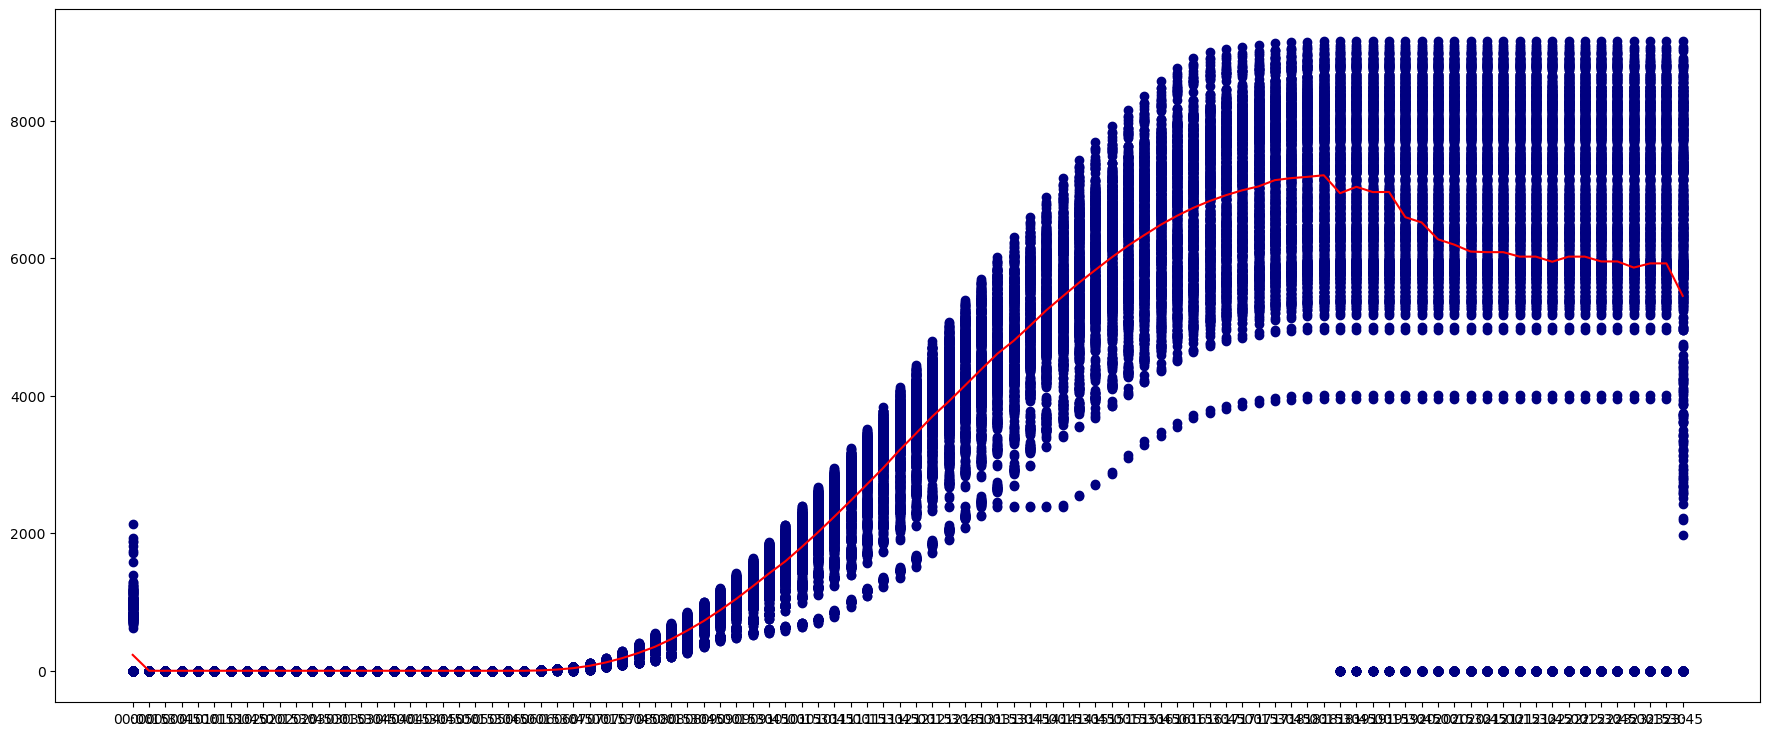

In [1664]:
copy_df2 = p1_gen_df.copy()
copy_df2['date_time'] = copy_df2['date_time'].dt.strftime('%H:%M')
copy_df2[copy_df2['source_key'] == 'zBIq5rxdHJRwDNY']
mean_dy = copy_df2.groupby('date_time')['daily_yield'].mean().reset_index()
plt.figure(figsize=(22,9))
plt.scatter(copy_df2['date_time'],copy_df2['daily_yield'],color='navy')
plt.plot(mean_dy['date_time'],mean_dy['daily_yield'],color = 'red')

plt.plot()
plt.show()
#GRAFICO DA ELIMINARE!!!!!!!!!!!!!

DEVO FARE SCATTER DEL DAILY_YIELD DI CIASCUN INVERTER PER TUTTI I GIORNI IN BASE ALL'ORARIO PER NOTARE CHE PER ALCUNI CI SONO DEI PROBLEMI OSSIA CHE A MEZZA NOTTE CI SONO DEI VALORI CHE NON DOVREBBERO ESISTERE, quindi spiegare che verranno eliminati dal dataset

<h3>Total Yield</h3>

--------------------------
--------------------------
--------------------------

IDEE GRAFICI POSSIBILI:

- funzionamento di un inverter, per ogni inverter plotto la quantità di dc ricevuta e la quantità di ac prodotta

- plotto lo stesso con la total yield

- indagare sul giorno che ha avuto la migliore produzione, quindi plotto il daily yield medio per ogni inverter ogni giorno?

OLTRE AL GRAFICO DOBBIAMO PENSARE ALLA SUA FUNZIONALITA' CHE INFORMAZIONI IMPORTANTI CI STA DANDO? (infatti il boxplot che ho fatto prima non saprei interpretarlo.. sarebbe da togliere)

--------------------------
--------------------------
--------------------------

<H3> EDA Weather Sensor Data Plant 1</h3>

In [1617]:
p1_wea_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [1618]:
p2_wea_df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


descrizione / spiegazione weather sensor data df 